In [ ]:
import random
import h5py
import numpy as np
import tensorflow as tf
from tensorflow.keras import utils
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Activation, Conv2D, MaxPooling2D

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# To get the images and labels from file
with h5py.File('/content/drive/MyDrive/Colab Notebooks/Galaxy10_DECals.h5', 'r') as F:
    images = np.array(F['images'])
    labels = np.array(F['ans'])

In [ ]:
'''
indices = list(range(len(images)))

selected_indices = random.sample(indices, 3000)

selected_images = np.array([images[i] for i in selected_indices])
selected_labels = np.array([labels[i] for i in selected_indices])


# To convert the labels to categorical 10 classes
selected_labels = utils.to_categorical(selected_labels)

# To convert to desirable type
selected_labels = selected_labels.astype(np.float32)
selected_images = selected_images.astype(np.float32) / 255.0
'''
# To convert the labels to categorical 10 classes
labels = utils.to_categorical(labels, 10)

# To convert to desirable type
selected_labels = labels.astype(np.float32)
selected_images = images.astype(np.float32) / 255.0

In [ ]:
train_idx, test_idx = train_test_split(np.arange(selected_labels.shape[0]), test_size=0.1)
train_images, train_labels, test_images, test_labels = selected_images[train_idx], selected_labels[train_idx], selected_images[test_idx], selected_labels[test_idx]

In [ ]:
# To build the CNN model
CNN_model = Sequential()
#Convolutional
CNN_model.add(tf.keras.layers.Conv2D(32,(3,3),activation = 'relu',input_shape = (256,256,3)))
CNN_model.add(tf.keras.layers.MaxPooling2D((2,2)))
CNN_model.add(tf.keras.layers.BatchNormalization(synchronized=True))

CNN_model.add(tf.keras.layers.Conv2D(32,(3,3),activation = 'relu'))
CNN_model.add(tf.keras.layers.AveragePooling2D((2,2)))
CNN_model.add(tf.keras.layers.BatchNormalization(synchronized=True))

CNN_model.add(tf.keras.layers.Conv2D(32,(3,3),activation = 'relu'))
CNN_model.add(tf.keras.layers.AveragePooling2D((2,2)))
CNN_model.add(tf.keras.layers.BatchNormalization(synchronized=True))

CNN_model.add(tf.keras.layers.Conv2D(32,(3,3),activation = 'relu'))
CNN_model.add(tf.keras.layers.AveragePooling2D((2,2)))
CNN_model.add(tf.keras.layers.BatchNormalization(synchronized=True))

CNN_model.add(tf.keras.layers.Conv2D(32,(3,3),activation = 'relu'))
CNN_model.add(tf.keras.layers.AveragePooling2D((2,2)))
CNN_model.add(tf.keras.layers.BatchNormalization(synchronized=True))

#Flatten
CNN_model.add(tf.keras.layers.Flatten())
#Fully connected
CNN_model.add(tf.keras.layers.Dense(128,activation = 'sigmoid'))
CNN_model.add(tf.keras.layers.BatchNormalization(synchronized=True))
CNN_model.add(tf.keras.layers.Dropout(0.5))
CNN_model.add(tf.keras.layers.Dense(128,activation = 'sigmoid'))
CNN_model.add(tf.keras.layers.BatchNormalization(synchronized=True))
CNN_model.add(tf.keras.layers.Dropout(0.5))
CNN_model.add(tf.keras.layers.Dense(128,activation = 'tanh'))
CNN_model.add(tf.keras.layers.BatchNormalization(synchronized=True))
CNN_model.add(tf.keras.layers.Dropout(0.5))
CNN_model.add(tf.keras.layers.Dense(128,activation = 'tanh'))
CNN_model.add(tf.keras.layers.BatchNormalization(synchronized=True))
CNN_model.add(tf.keras.layers.Dropout(0.5))
CNN_model.add(tf.keras.layers.Dense(128,activation = 'relu'))
CNN_model.add(tf.keras.layers.BatchNormalization(synchronized=True))
CNN_model.add(tf.keras.layers.Dropout(0.5))
CNN_model.add(tf.keras.layers.Dense(128,activation = 'relu'))
CNN_model.add(tf.keras.layers.BatchNormalization(synchronized=True))
CNN_model.add(tf.keras.layers.Dropout(0.5))
#output
CNN_model.add(tf.keras.layers.Dense(10,activation = 'softmax'))

CNN_model.compile(optimizer = 'adam',loss = 'categorical_crossentropy',metrics = ['accuracy'])
CNN_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 127, 127, 32)      128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      9248      
                                                                 
 average_pooling2d (Average  (None, 62, 62, 32)        0         
 Pooling2D)                                                      
                                                        

In [ ]:
batch_size = 32
epochs = 40

# keep a validation split of 0.2 to begin with and fit the model
# your code here
history = CNN_model.fit(train_images, train_labels,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_split=0.3)

Epoch 1/40
350/350 [==============================] - 37s 46ms/step - loss: 2.8091 - accuracy: 0.1530 - val_loss: 2.3569 - val_accuracy: 0.1846
Epoch 2/40
350/350 [==============================] - 10s 29ms/step - loss: 2.1983 - accuracy: 0.2047 - val_loss: 2.3008 - val_accuracy: 0.2080
Epoch 3/40
350/350 [==============================] - 10s 29ms/step - loss: 2.0203 - accuracy: 0.2362 - val_loss: 1.9996 - val_accuracy: 0.2748
Epoch 4/40
350/350 [==============================] - 10s 29ms/step - loss: 1.8681 - accuracy: 0.2811 - val_loss: 1.6663 - val_accuracy: 0.3610
Epoch 5/40
350/350 [==============================] - 10s 30ms/step - loss: 1.7646 - accuracy: 0.3298 - val_loss: 1.5742 - val_accuracy: 0.3928
Epoch 6/40
350/350 [==============================] - 10s 29ms/step - loss: 1.7133 - accuracy: 0.3554 - val_loss: 1.5706 - val_accuracy: 0.4187
Epoch 7/40
350/350 [==============================] - 10s 29ms/step - loss: 1.6483 - accuracy: 0.3841 - val_loss: 1.9674 - val_accuracy:

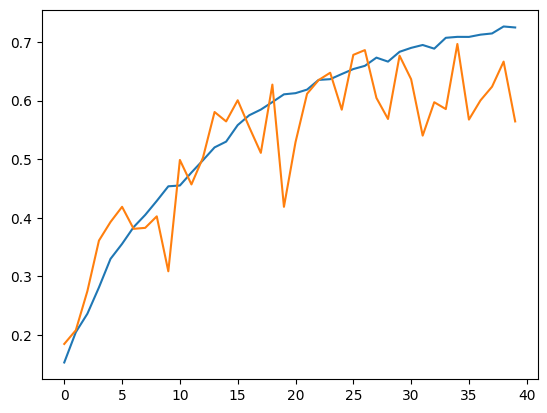

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

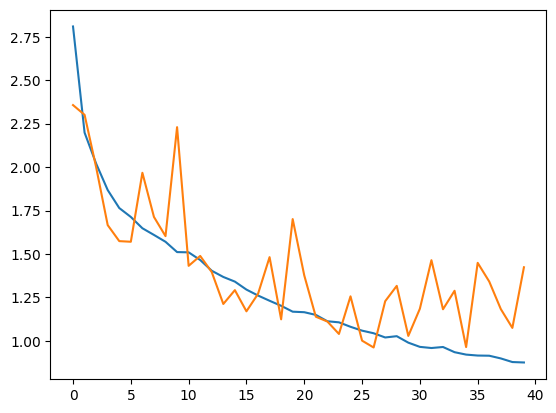

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [ ]:
CNN_model.evaluate(test_images, test_labels)

56/56 [==============================] - 1s 14ms/step - loss: 1.4256 - accuracy: 0.5626


[1.4256385564804077, 0.5625704526901245]

In [ ]:
from sklearn.metrics import confusion_matrix
test_pred = CNN_model.predict(test_images)
test_pred = np.argmax(test_pred, axis=1)
test_labels = np.argmax(test_labels, axis=1)

print(confusion_matrix(test_labels, test_pred))

56/56 [==============================] - 1s 10ms/step
[[ 40   1  14  15   1   0   0  30   6   0]
 [  4  75  19  22   2   7   0  35   2   1]
 [  4   1 252   2   0   0   0   2   0   0]
 [  3   1  26 177   0   0   2   4   0   0]
 [  6   1   0  15  11   0   0   2   0   1]
 [ 18   3   6   7   0  29   6 142   2   1]
 [ 34   0  25   5   0   1  35  69   3   0]
 [ 79   2  14   9   2   2   9 154   5   0]
 [ 11   0   0   0   0   0   0   1 134   1]
 [  0   9   0  13  28   1   0  11  28  91]]


In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(test_labels, test_pred))

0.5625704622322435


In [ ]:
from sklearn.metrics import precision_score
print(precision_score(test_labels, test_pred, average='macro'))
print(precision_score(test_labels, test_pred, average='micro'))
print(precision_score(test_labels, test_pred, average='weighted'))
print(precision_score(test_labels, test_pred, average=None))

0.6075884661455762
0.5625704622322435
0.6428357020093942
[0.20100503 0.80645161 0.70786517 0.66792453 0.25       0.725
 0.67307692 0.34222222 0.74444444 0.95789474]


In [ ]:
from sklearn.metrics import recall_score

print(recall_score(test_labels, test_pred, average='macro'))
print(recall_score(test_labels, test_pred, average='micro'))
print(recall_score(test_labels, test_pred, average='weighted'))
print(recall_score(test_labels, test_pred, average=None))

0.5236292746602876
0.5625704622322435
0.5625704622322435
[0.37383178 0.4491018  0.96551724 0.83098592 0.30555556 0.13551402
 0.20348837 0.55797101 0.91156463 0.50276243]


In [ ]:
from sklearn.metrics import f1_score

print(f1_score(test_labels, test_pred, average='macro'))
print(f1_score(test_labels, test_pred, average='micro'))
print(f1_score(test_labels, test_pred, average='weighted'))
print(f1_score(test_labels, test_pred, average=None))

0.5114883549358898
0.5625704622322435
0.5438011945539505
[0.26143791 0.57692308 0.81685575 0.74058577 0.275      0.22834646
 0.3125     0.42424242 0.81957187 0.65942029]
